In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To show the all columns
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 85)

F:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_df=pd.read_csv("House Datasets/train.csv")
test_df=pd.read_csv("House Datasets/test.csv")
ans_df=pd.read_csv("House Datasets/sample_submission.csv")

ans_df=ans_df.drop("Id", axis=1)
test_df=pd.concat([test_df, ans_df], axis=1)

In [3]:
df=pd.concat([train_df, test_df], axis=0)

In [4]:
df.drop("Id", axis=1, inplace=True)
df.shape

(2919, 80)

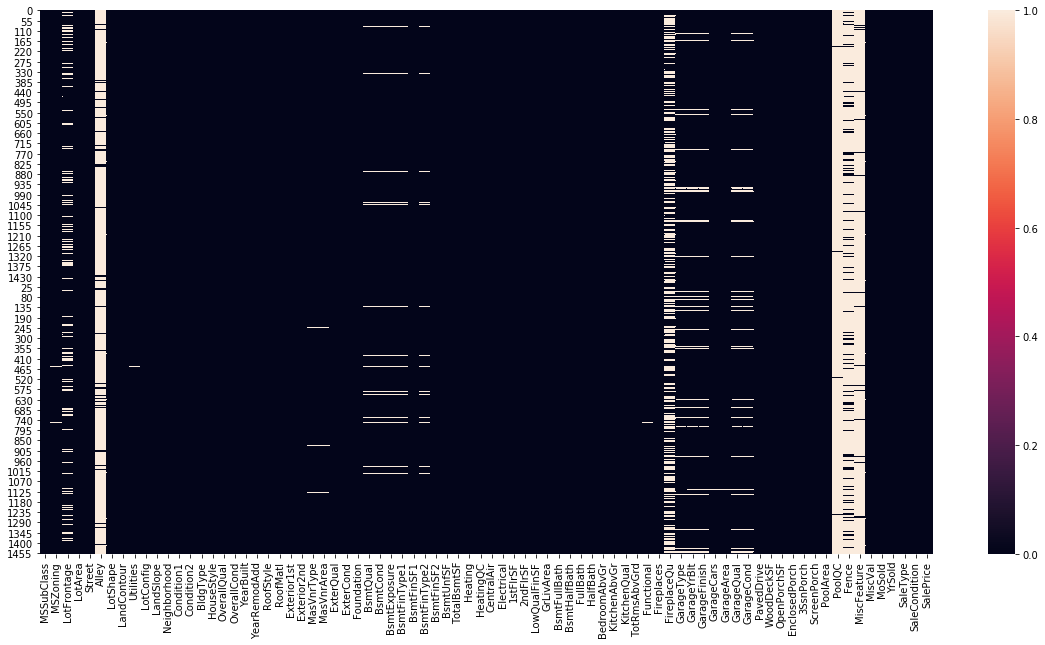

In [5]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull())

In [6]:
null_features=[]

for feature in df.columns:
    
    print("{} has {}% of null values i.e {} out of {}".format(
        feature,
        np.round(df[feature].isnull().mean()*100, 2),
        (df[feature].isnull().sum()),
        len(df)
    ))
    
    null_features.append(feature)

MSSubClass has 0.0% of null values i.e 0 out of 2919
MSZoning has 0.14% of null values i.e 4 out of 2919
LotFrontage has 16.65% of null values i.e 486 out of 2919
LotArea has 0.0% of null values i.e 0 out of 2919
Street has 0.0% of null values i.e 0 out of 2919
Alley has 93.22% of null values i.e 2721 out of 2919
LotShape has 0.0% of null values i.e 0 out of 2919
LandContour has 0.0% of null values i.e 0 out of 2919
Utilities has 0.07% of null values i.e 2 out of 2919
LotConfig has 0.0% of null values i.e 0 out of 2919
LandSlope has 0.0% of null values i.e 0 out of 2919
Neighborhood has 0.0% of null values i.e 0 out of 2919
Condition1 has 0.0% of null values i.e 0 out of 2919
Condition2 has 0.0% of null values i.e 0 out of 2919
BldgType has 0.0% of null values i.e 0 out of 2919
HouseStyle has 0.0% of null values i.e 0 out of 2919
OverallQual has 0.0% of null values i.e 0 out of 2919
OverallCond has 0.0% of null values i.e 0 out of 2919
YearBuilt has 0.0% of null values i.e 0 out of 291

In [7]:
for feature in null_features:
    
    if(np.round(df[feature].isnull().mean()*100, 2)>40):
        
        df.drop(feature, axis=1, inplace=True)
        
null_features=[]

for feature in df.columns:
    
    print("{} has {}% of null values i.e {} out of {}".format(
        feature,
        np.round(df[feature].isnull().mean()*100, 2),
        (df[feature].isnull().sum()),
        len(df)
    ))
    
    null_features.append(feature)

MSSubClass has 0.0% of null values i.e 0 out of 2919
MSZoning has 0.14% of null values i.e 4 out of 2919
LotFrontage has 16.65% of null values i.e 486 out of 2919
LotArea has 0.0% of null values i.e 0 out of 2919
Street has 0.0% of null values i.e 0 out of 2919
LotShape has 0.0% of null values i.e 0 out of 2919
LandContour has 0.0% of null values i.e 0 out of 2919
Utilities has 0.07% of null values i.e 2 out of 2919
LotConfig has 0.0% of null values i.e 0 out of 2919
LandSlope has 0.0% of null values i.e 0 out of 2919
Neighborhood has 0.0% of null values i.e 0 out of 2919
Condition1 has 0.0% of null values i.e 0 out of 2919
Condition2 has 0.0% of null values i.e 0 out of 2919
BldgType has 0.0% of null values i.e 0 out of 2919
HouseStyle has 0.0% of null values i.e 0 out of 2919
OverallQual has 0.0% of null values i.e 0 out of 2919
OverallCond has 0.0% of null values i.e 0 out of 2919
YearBuilt has 0.0% of null values i.e 0 out of 2919
YearRemodAdd has 0.0% of null values i.e 0 out of 2

In [8]:
num_features=[]
cat_features=[]
for feature in null_features:
    
    if(df[feature].dtypes=='O'):
        cat_features.append(feature)
    else:
        num_features.append(feature)
        
print(len(num_features), len(cat_features))

37 38


In [9]:
for feature in num_features:
    
    df[feature]=df[feature].fillna(df[feature].mean())

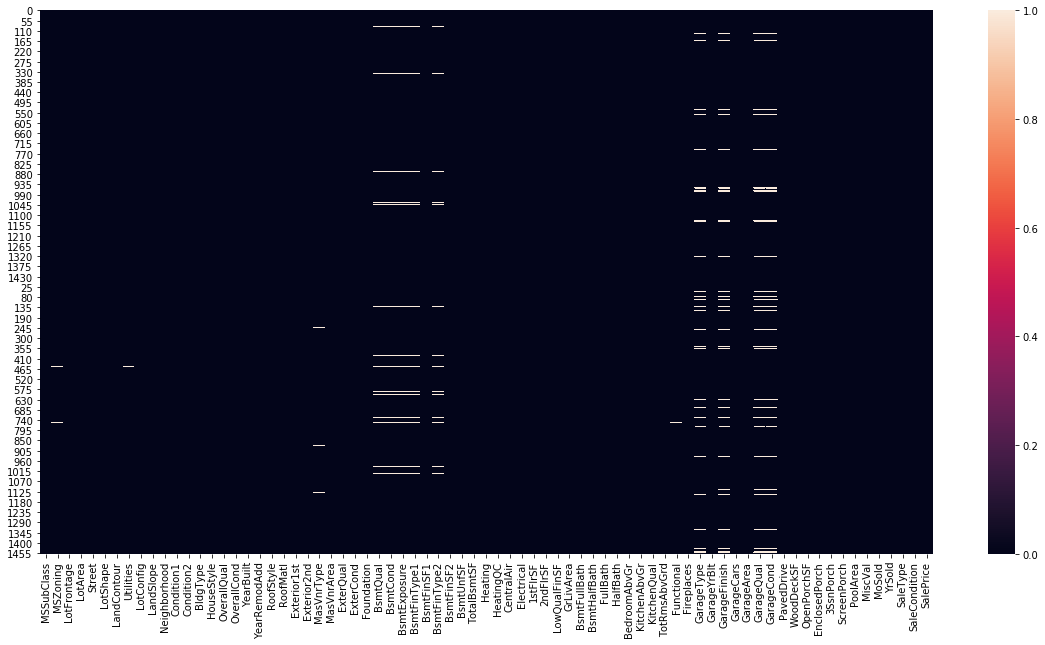

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull())

In [11]:
for feature in cat_features:
    
    df[feature]=df[feature].fillna(df[feature].mode()[0])

In [12]:
year_features=[x for x in df.columns if('Yr' in x) or ("Year" in x)]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [13]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    
    df[feature]=df["YrSold"]-df[feature]
    
df[year_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.000000,2008
1,31,31,31.000000,2007
2,7,6,7.000000,2008
3,91,36,8.000000,2006
4,8,8,8.000000,2008
...,...,...,...,...
1454,36,36,27.886594,2006
1455,36,36,36.000000,2006
1456,46,10,46.000000,2006
1457,14,14,27.886594,2006


In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
le=LabelEncoder()
sc=StandardScaler()

In [15]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [16]:
num_features=[]
cat_features=[]

for feature in df.columns:
    
    if(df[feature].dtypes=='O'):
        cat_features.append(feature)
    else:
        num_features.append(feature)
        
print(len(num_features), len(cat_features))

37 38


In [17]:
num_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [18]:
for feature in cat_features:
    df[feature]=le.fit_transform(df[feature])
    
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,5.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500.0
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,1,31.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500.0
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,1,7.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500.0


In [19]:
for feature in ['LotFrontage', 'LotArea', 'MSSubClass', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', "SalePrice"]:
    df[feature]=np.log(df[feature]+1)
    
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.110874,3,4.189655,9.042040,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,12,13,1,5.283204,2,4,2,2,3,3,2,6.561031,5,0.0,5.017280,6.753438,1,0,1,4,6.753438,6.751101,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,5.0,1,2.0,6.308098,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,12.247699
1,3.044522,3,4.394449,9.169623,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,2,0.000000,3,4,1,2,3,1,0,6.886532,5,0.0,5.652489,7.141245,1,0,1,4,7.141245,0.000000,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,1,31.0,1,2.0,6.133398,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,12.109016
2,4.110874,3,4.234107,9.328212,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,12,13,1,5.093750,2,4,2,2,3,2,2,6.188264,5,0.0,6.075346,6.825460,1,0,1,4,6.825460,6.765039,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,1,7.0,1,2.0,6.411818,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,12.317171
3,4.262680,3,4.110874,9.164401,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,1,1,13,15,2,0.000000,3,4,0,3,1,3,0,5.379897,5,0.0,6.293419,6.629363,1,2,1,4,6.869014,6.629363,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,5,8.0,2,3.0,6.466145,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,11.849405
4,4.110874,3,4.442651,9.565284,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,1,1,12,13,1,5.860786,2,4,2,2,3,0,2,6.486161,5,0.0,6.196444,7.044033,1,0,1,4,7.044033,6.960348,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,1,8.0,1,3.0,6.729824,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,12.429220


In [20]:
X=df.drop("SalePrice", axis=1)
y=df.SalePrice

In [21]:
test=X.tail(1459).copy()

In [22]:
test=sc.fit_transform(test)
test[0]

array([-1.11658492, -1.50177721,  0.60666749,  0.5617868 ,  0.06426031,
        0.7426201 ,  0.31870027,  0.        ,  0.57244529, -0.20799191,
       -0.10567223, -1.1931828 ,  0.02869073, -0.42662461, -0.53020667,
       -0.75110125,  0.40076604,  0.41378443,  1.17839064, -0.47431526,
       -0.1075886 ,  0.74248327,  0.74905723,  0.38267875, -0.79701723,
        0.67354752,  0.38885166, -0.5330071 ,  0.83928316,  0.2903469 ,
        0.620425  ,  0.63606181,  0.64858391, -1.57896455,  0.5173601 ,
       -0.00226953,  0.05598275, -0.07878386,  1.41552235,  0.27271612,
        0.29881849, -0.61288697, -0.85715359, -0.08048311, -1.21558782,
       -0.81955611, -0.2585051 , -1.02871967, -0.75103955, -1.02954254,
       -0.20390986,  0.77000215, -0.91833473,  0.25838999, -0.89805519,
       -0.68970141,  0.73681512,  0.93316918, -0.98801317,  0.54608184,
        0.25040925,  0.1869024 ,  0.33911372,  0.36667832, -0.70162774,
       -0.3607383 , -0.08882665,  1.81895951, -0.05722694, -0.09

In [23]:
X=sc.fit_transform(X)
X[0]

array([ 0.41941837, -0.04215657, -0.04971652, -0.10371897,  0.06424926,
        0.74666938,  0.31667058, -0.01851217,  0.58855537, -0.21626042,
       -1.24847593, -0.04625807, -0.00981635, -0.41917426,  1.03172081,
        0.6461834 , -0.5072842 , -1.03788118, -0.8870086 , -0.48292558,
       -0.11692303,  0.7427876 ,  0.75033424, -1.26715127,  1.20731009,
       -0.7557934 ,  0.37646067,  0.834618  , -0.2942027 ,  0.28566991,
        0.62460672, -0.44973568,  0.78308517,  0.31590894, -0.29313001,
       -0.32692881,  0.01719885, -0.1032061 , -0.8803244 ,  0.26828983,
        0.30061479, -0.77728668,  1.19687551, -0.10119702,  0.41354722,
        1.08702254, -0.24989517,  0.78136581,  1.23259887,  0.16992709,
       -0.20769847, -0.41599598,  0.98684937,  0.25680588, -0.92431121,
       -0.68823468, -0.99097735, -0.28052505,  0.30652779,  0.34374119,
        0.23353409,  0.18646014,  0.31502962, -0.74076041,  0.20000601,
       -0.35960075, -0.10333053, -0.28593546, -0.06315017, -0.08

In [24]:
test.shape

(1459, 74)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=100)

In [26]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [27]:
xgb.fit(X_train, y_train).score(X_test, y_test)

[17:09:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.5051213998904139

In [28]:
y_pred=np.exp(xgb.predict(X_test))
y_pred[0:20]

array([171564.8 , 165788.61, 207865.61, 143580.75, 157332.83, 165828.31,
       176225.6 , 178604.62, 224761.45, 132984.77, 128784.02, 148433.62,
       179779.67, 116257.49, 204064.33, 139147.44, 152789.33, 134733.9 ,
       156640.27, 190622.17], dtype=float32)

In [29]:
real_price=np.array(np.exp(y_test))
real_price[:20]

array([173001.        , 165001.        , 226001.        , 105001.        ,
       188091.10080803, 165634.57332584, 192501.        , 180001.        ,
       262281.        , 182286.14023328, 168716.9501117 , 191620.29464884,
       158164.72092977,  72501.        , 194651.21097987, 180963.86807161,
       177031.47784202, 121601.        , 173734.        , 173258.6378262 ])

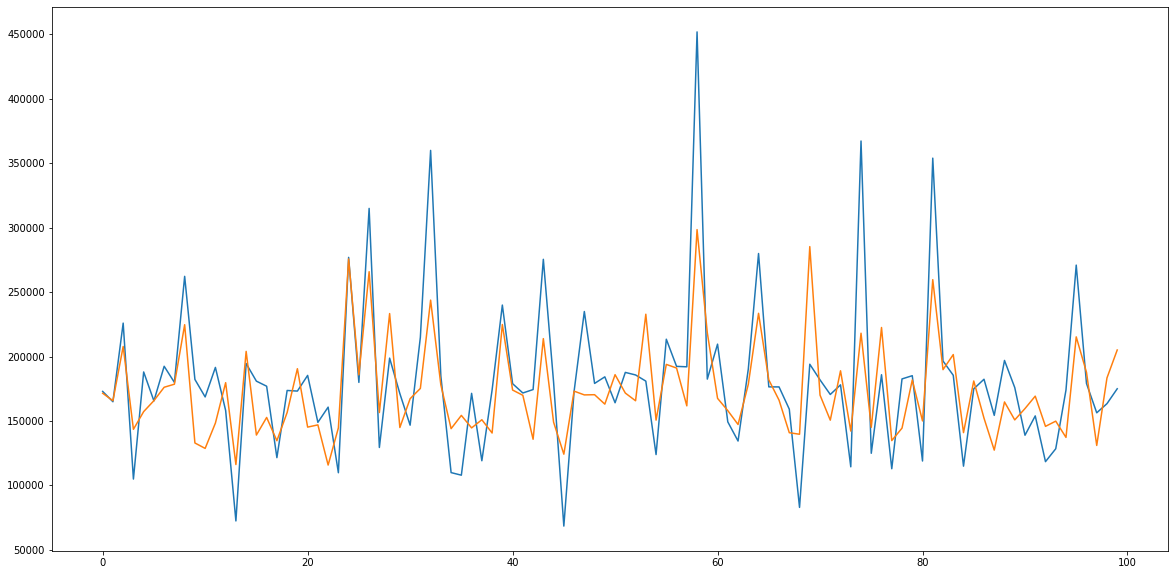

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(real_price[:100])
plt.plot(y_pred[:100])

In [31]:

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [32]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xgb,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [33]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   51.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.2min finished


[17:11:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [34]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [35]:
random_cv.best_score_

-0.15984952386885537

In [36]:
xgb=random_cv.best_estimator_
xgb.fit(X_train, y_train)

[17:11:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [37]:
y_pred=np.exp(xgb.predict(X_test))
y_pred[0:20]

array([168414.83, 168302.44, 214157.6 , 142513.53, 170133.9 , 171876.92,
       176887.14, 182150.9 , 234354.16, 135443.38, 129487.47, 153382.78,
       179725.84, 104765.09, 206423.31, 138467.42, 140668.48, 132205.44,
       171267.6 , 190385.45], dtype=float32)

In [38]:
real_price=np.array(np.exp(y_test))
real_price[:20]

array([173001.        , 165001.        , 226001.        , 105001.        ,
       188091.10080803, 165634.57332584, 192501.        , 180001.        ,
       262281.        , 182286.14023328, 168716.9501117 , 191620.29464884,
       158164.72092977,  72501.        , 194651.21097987, 180963.86807161,
       177031.47784202, 121601.        , 173734.        , 173258.6378262 ])

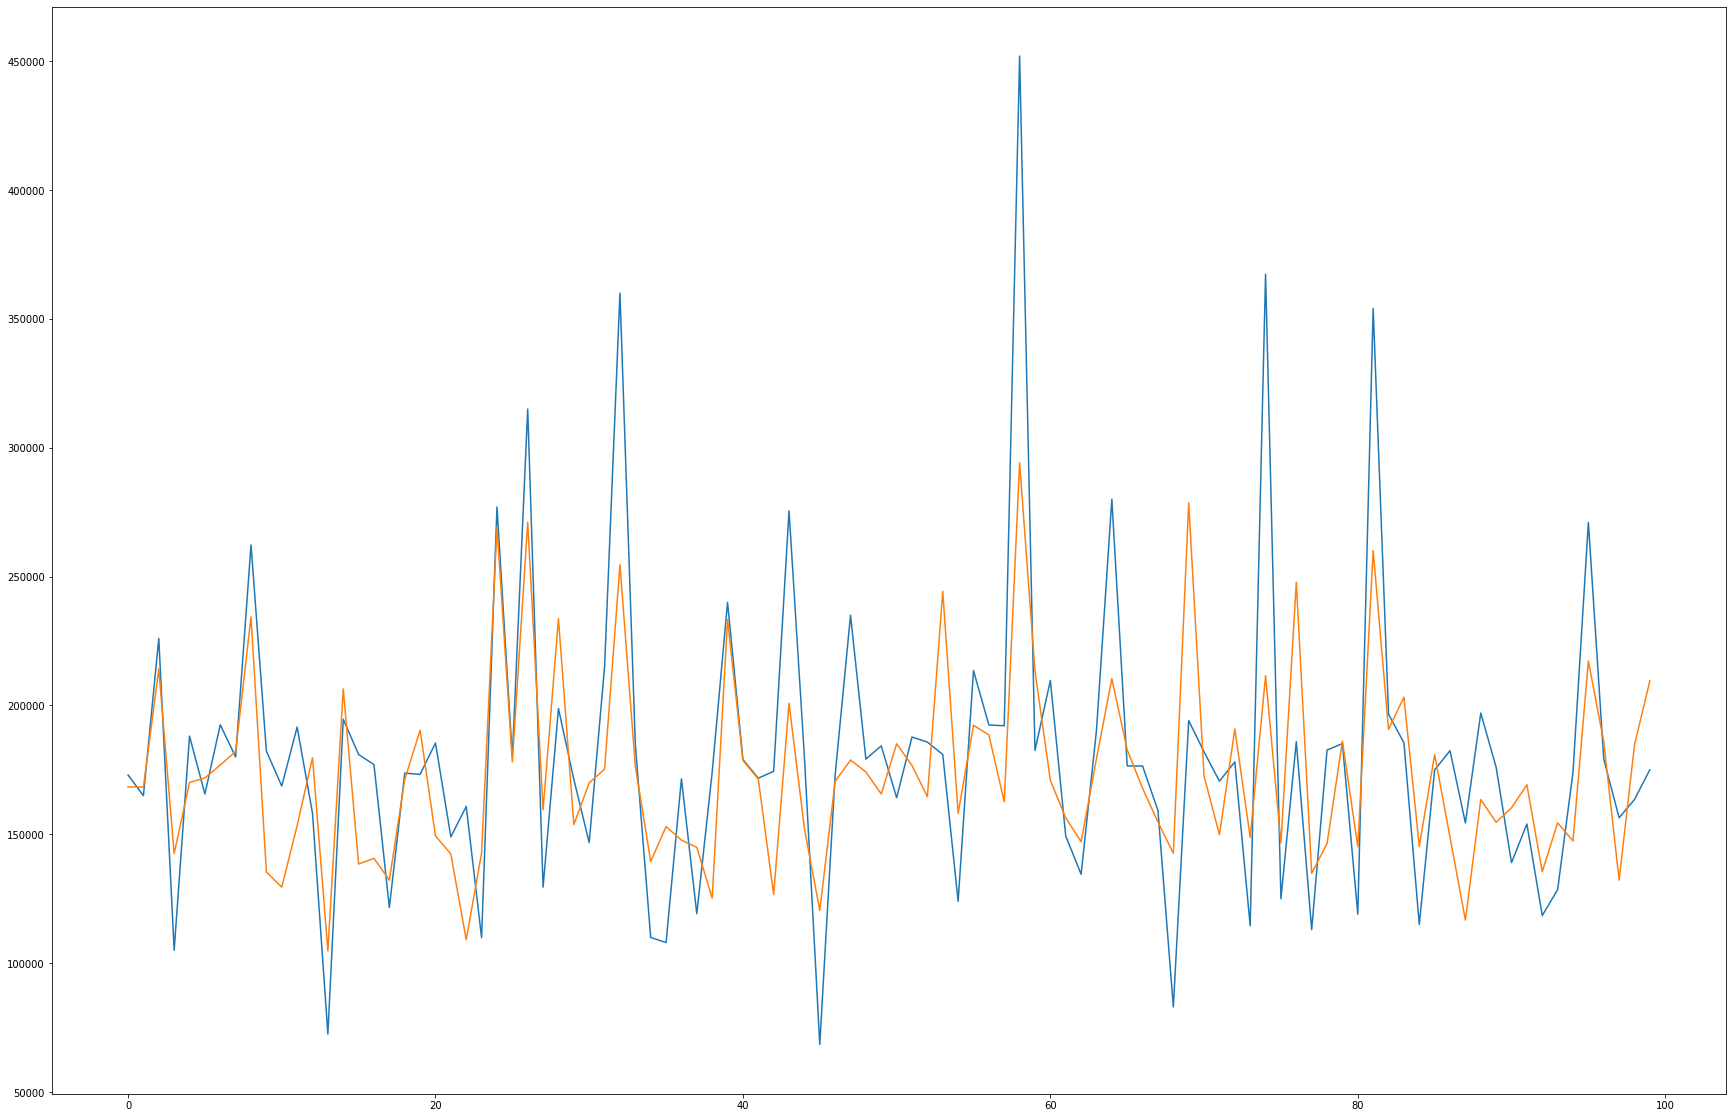

In [39]:
plt.figure(figsize=(30, 20))
plt.plot(real_price[:100])
plt.plot(y_pred[:100])

In [40]:
y_pred=np.exp(xgb.predict(test))
y_pred[:10], real_price[:10]

(array([148512.92, 175248.17, 189016.12, 181358.94, 163107.2 , 175161.95,
        174423.  , 166232.7 , 173156.92, 134996.67], dtype=float32),
 array([173001.        , 165001.        , 226001.        , 105001.        ,
        188091.10080803, 165634.57332584, 192501.        , 180001.        ,
        262281.        , 182286.14023328]))

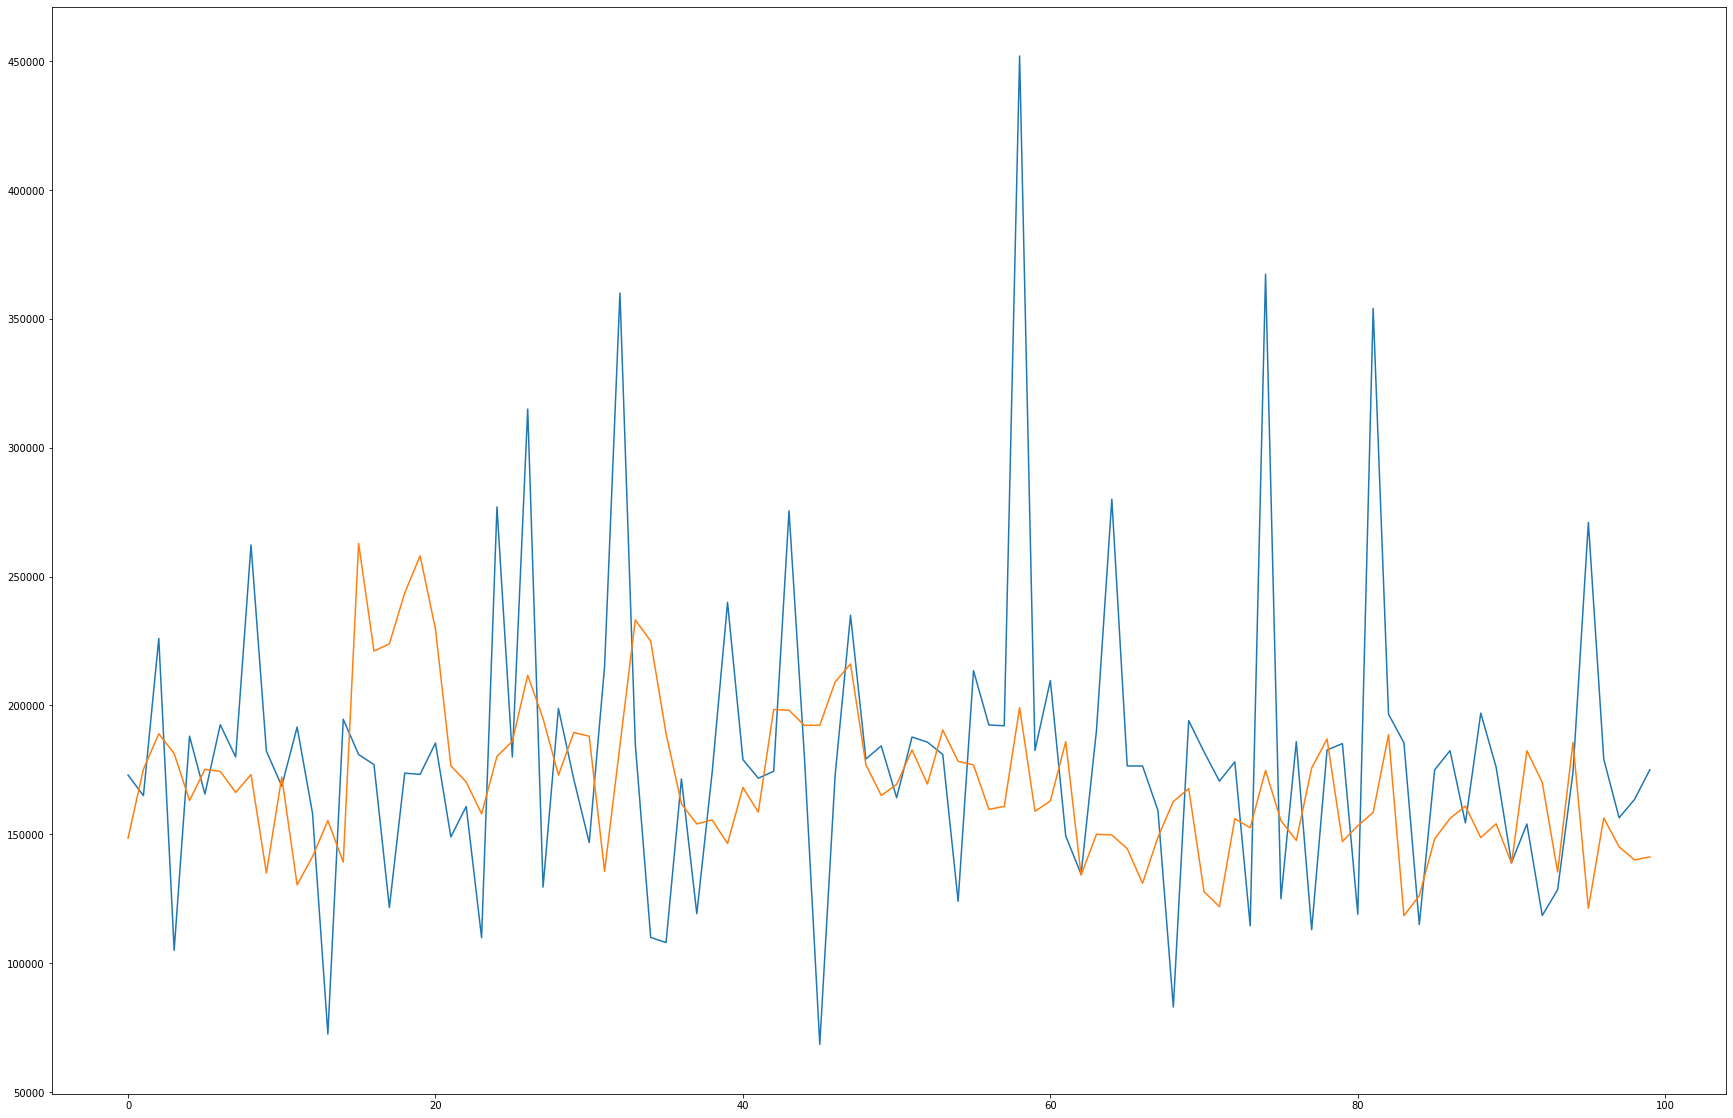

In [41]:
plt.figure(figsize=(30, 20))
plt.plot(real_price[:100])
plt.plot(y_pred[:100])

In [42]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 150, init = 'he_uniform',activation='relu',input_dim = 74))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 100, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=keras.losses.mean_absolute_error, optimizer='Adamax', metrics=['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.1, batch_size = 10, nb_epoch = 200)

Using TensorFlow backend.
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=74, units=150, kernel_initializer="he_uniform")`
  del sys.path[0]
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100, kernel_initializer="he_uniform")`
  app.launch_new_instance()
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packa

Train on 2101 samples, validate on 234 samples
Epoch 1/200
2101/2101 [==============================] - 1s 353us/step - loss: 1.8927 - accuracy: 0.0000e+00 - val_loss: 1.0577 - val_accuracy: 0.0000e+00
Epoch 2/200
2101/2101 [==============================] - 0s 181us/step - loss: 0.9128 - accuracy: 0.0000e+00 - val_loss: 0.9254 - val_accuracy: 0.0000e+00
Epoch 3/200
2101/2101 [==============================] - 0s 179us/step - loss: 0.7136 - accuracy: 0.0000e+00 - val_loss: 0.8133 - val_accuracy: 0.0000e+00
Epoch 4/200
2101/2101 [==============================] - 0s 174us/step - loss: 0.6117 - accuracy: 0.0000e+00 - val_loss: 0.7462 - val_accuracy: 0.0000e+00
Epoch 5/200
2101/2101 [==============================] - 0s 177us/step - loss: 0.5700 - accuracy: 0.0000e+00 - val_loss: 0.7290 - val_accuracy: 0.0000e+00
Epoch 6/200
2101/2101 [==============================] - 0s 178us/step - loss: 0.4761 - accuracy: 0.0000e+00 - val_loss: 0.6947 - val_accuracy: 0.0000e+00
Epoch 7/200
2101/2101 [

2101/2101 [==============================] - 0s 186us/step - loss: 0.1586 - accuracy: 0.0000e+00 - val_loss: 0.3922 - val_accuracy: 0.0000e+00
Epoch 54/200
2101/2101 [==============================] - 0s 205us/step - loss: 0.1697 - accuracy: 0.0000e+00 - val_loss: 0.3962 - val_accuracy: 0.0000e+00
Epoch 55/200
2101/2101 [==============================] - 0s 198us/step - loss: 0.1703 - accuracy: 0.0000e+00 - val_loss: 0.3962 - val_accuracy: 0.0000e+00
Epoch 56/200
2101/2101 [==============================] - 0s 182us/step - loss: 0.1579 - accuracy: 0.0000e+00 - val_loss: 0.3833 - val_accuracy: 0.0000e+00
Epoch 57/200
2101/2101 [==============================] - 0s 190us/step - loss: 0.1616 - accuracy: 0.0000e+00 - val_loss: 0.3850 - val_accuracy: 0.0000e+00
Epoch 58/200
2101/2101 [==============================] - 0s 182us/step - loss: 0.1582 - accuracy: 0.0000e+00 - val_loss: 0.3806 - val_accuracy: 0.0000e+00
Epoch 59/200
2101/2101 [==============================] - 0s 182us/step - los

2101/2101 [==============================] - 0s 181us/step - loss: 0.1147 - accuracy: 0.0000e+00 - val_loss: 0.2985 - val_accuracy: 0.0000e+00
Epoch 106/200
2101/2101 [==============================] - 0s 172us/step - loss: 0.1076 - accuracy: 0.0000e+00 - val_loss: 0.3140 - val_accuracy: 0.0000e+00
Epoch 107/200
2101/2101 [==============================] - 0s 183us/step - loss: 0.1222 - accuracy: 0.0000e+00 - val_loss: 0.2974 - val_accuracy: 0.0000e+00
Epoch 108/200
2101/2101 [==============================] - 0s 192us/step - loss: 0.1137 - accuracy: 0.0000e+00 - val_loss: 0.2943 - val_accuracy: 0.0000e+00
Epoch 109/200
2101/2101 [==============================] - 0s 188us/step - loss: 0.1155 - accuracy: 0.0000e+00 - val_loss: 0.3006 - val_accuracy: 0.0000e+00
Epoch 110/200
2101/2101 [==============================] - 0s 185us/step - loss: 0.1145 - accuracy: 0.0000e+00 - val_loss: 0.2849 - val_accuracy: 0.0000e+00
Epoch 111/200
2101/2101 [==============================] - 0s 185us/step

2101/2101 [==============================] - 0s 180us/step - loss: 0.0863 - accuracy: 0.0000e+00 - val_loss: 0.2437 - val_accuracy: 0.0000e+00
Epoch 158/200
2101/2101 [==============================] - 0s 179us/step - loss: 0.0937 - accuracy: 0.0000e+00 - val_loss: 0.2768 - val_accuracy: 0.0000e+00
Epoch 159/200
2101/2101 [==============================] - 0s 179us/step - loss: 0.0933 - accuracy: 0.0000e+00 - val_loss: 0.2596 - val_accuracy: 0.0000e+00
Epoch 160/200
2101/2101 [==============================] - 0s 194us/step - loss: 0.0807 - accuracy: 0.0000e+00 - val_loss: 0.2425 - val_accuracy: 0.0000e+00
Epoch 161/200
2101/2101 [==============================] - 0s 193us/step - loss: 0.0769 - accuracy: 0.0000e+00 - val_loss: 0.2456 - val_accuracy: 0.0000e+00
Epoch 162/200
2101/2101 [==============================] - 0s 183us/step - loss: 0.0889 - accuracy: 0.0000e+00 - val_loss: 0.2441 - val_accuracy: 0.0000e+00
Epoch 163/200
2101/2101 [==============================] - 0s 179us/step

In [43]:
y_pred=np.exp(classifier.predict(X_test))
y_pred[:20]

array([[151004.38],
       [184503.27],
       [228152.48],
       [134928.84],
       [158228.14],
       [208776.11],
       [165321.75],
       [148786.53],
       [256614.17],
       [115568.48],
       [155266.61],
       [155594.5 ],
       [165489.6 ],
       [192830.36],
       [228692.3 ],
       [152119.22],
       [154359.5 ],
       [150389.7 ],
       [156081.97],
       [218692.84]], dtype=float32)

In [44]:
real_price[:10]

array([173001.        , 165001.        , 226001.        , 105001.        ,
       188091.10080803, 165634.57332584, 192501.        , 180001.        ,
       262281.        , 182286.14023328])

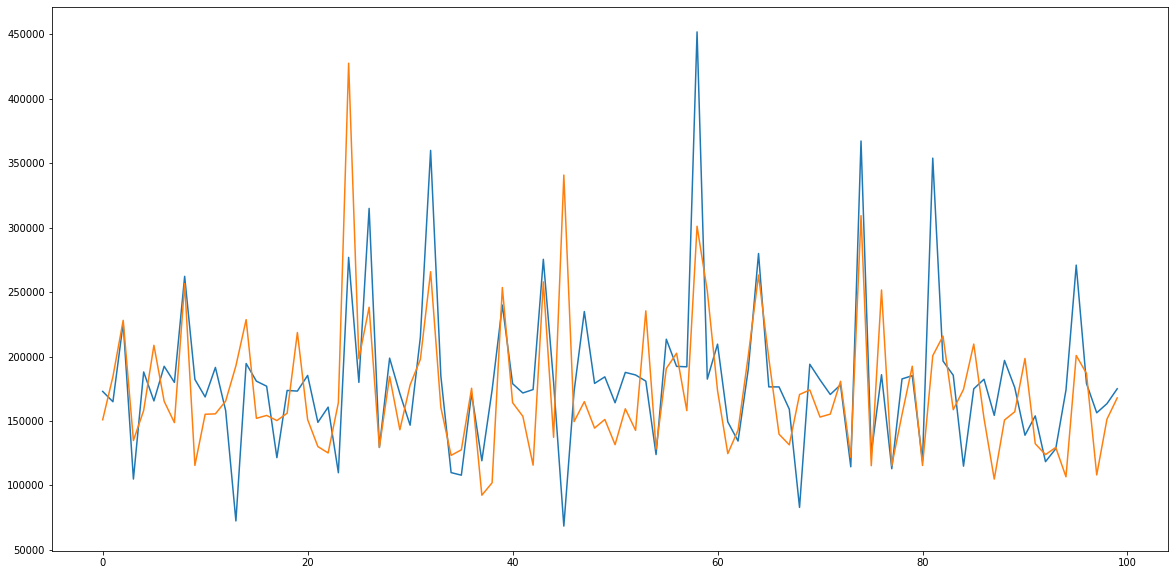

In [45]:
plt.figure(figsize=(20, 10))
plt.plot(real_price[:100])
plt.plot(y_pred[:100])

In [46]:
y_pred=np.exp(xgb.predict(test))
y_pred[:10], real_price[:10]

(array([148512.92, 175248.17, 189016.12, 181358.94, 163107.2 , 175161.95,
        174423.  , 166232.7 , 173156.92, 134996.67], dtype=float32),
 array([173001.        , 165001.        , 226001.        , 105001.        ,
        188091.10080803, 165634.57332584, 192501.        , 180001.        ,
        262281.        , 182286.14023328]))

In [47]:
test

array([[-1.11658492, -1.50177721,  0.60666749, ...,  1.71390537,
         0.32475004,  0.20138321],
       [-1.11658492, -0.03909834,  0.64417627, ...,  1.71390537,
         0.32475004,  0.20138321],
       [ 0.41444942, -0.03909834,  0.37140322, ...,  1.71390537,
         0.32475004,  0.20138321],
       ...,
       [-1.11658492, -0.03909834,  2.70663928, ..., -1.35995811,
         0.32475004, -3.58981811],
       [ 0.90759794, -0.03909834, -0.16158232, ..., -1.35995811,
         0.32475004,  0.20138321],
       [ 0.41444942, -0.03909834,  0.37140322, ..., -1.35995811,
         0.32475004,  0.20138321]])

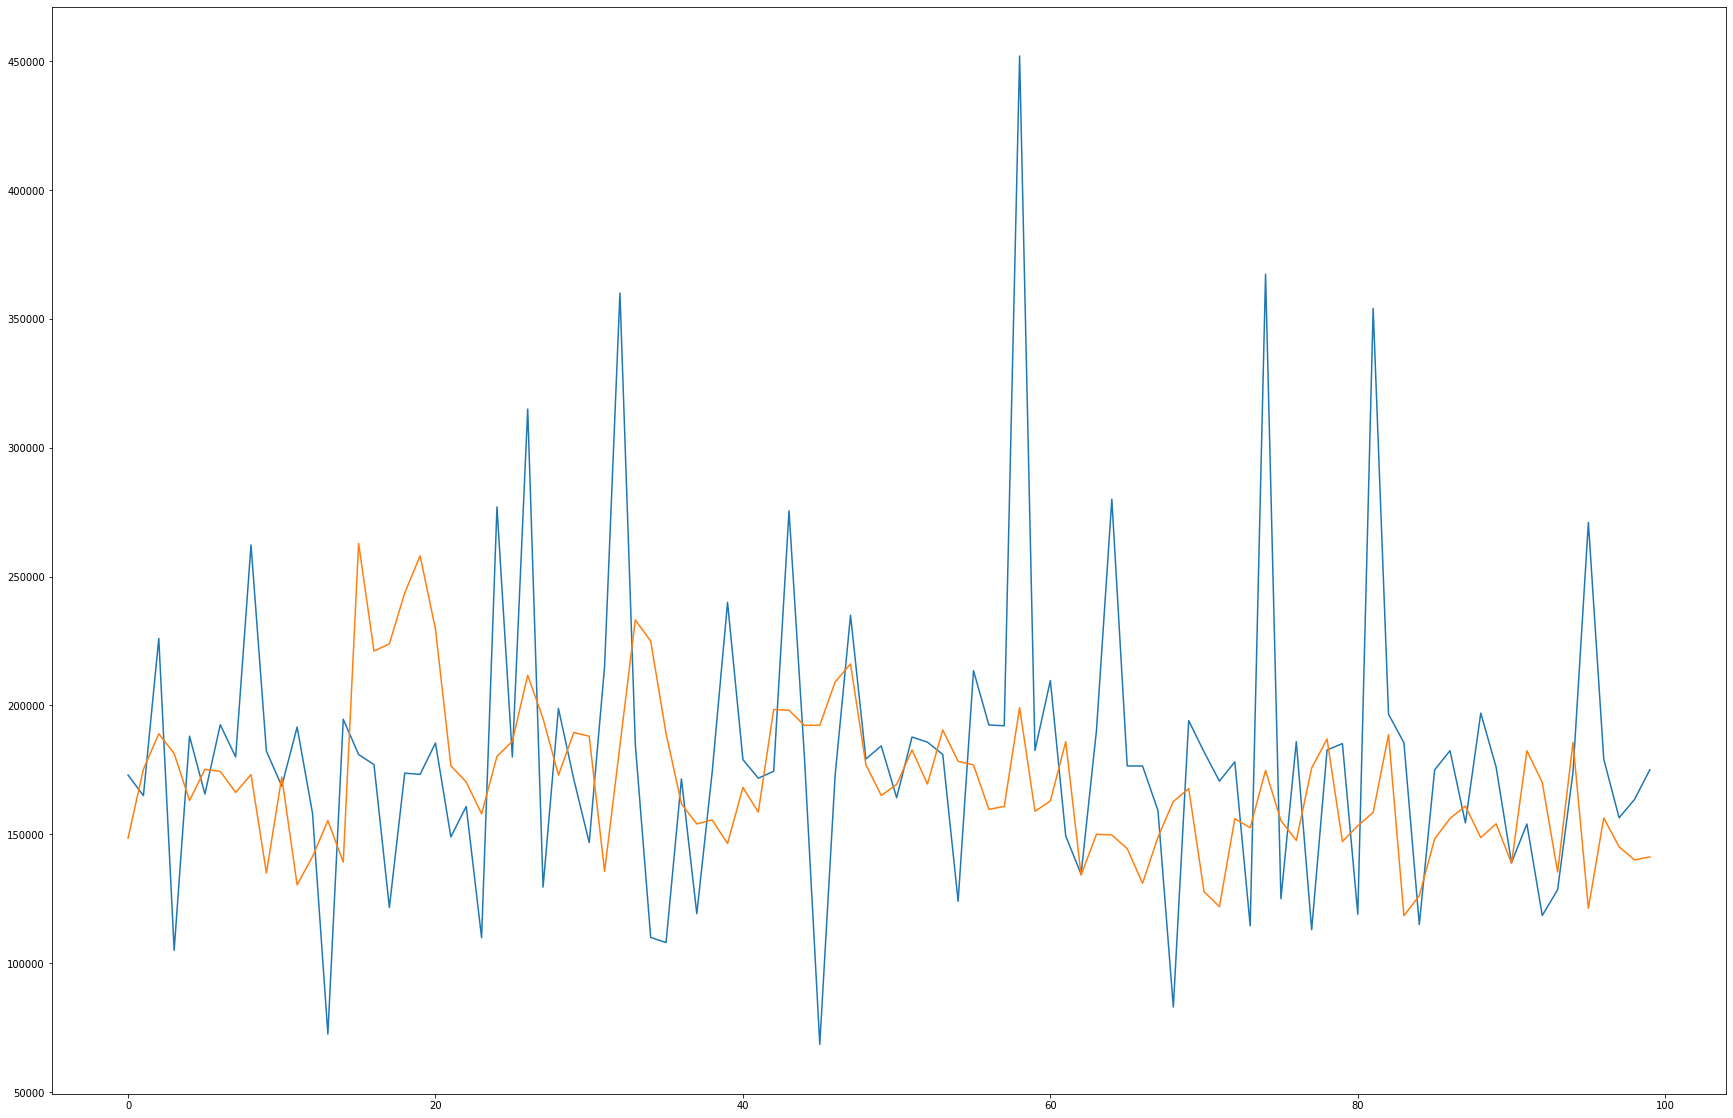

In [48]:
plt.figure(figsize=(30, 20))
plt.plot(real_price[:100])
plt.plot(y_pred[:100])